In [4]:
import pandas as pd

df = pd.read_csv("retail_sales.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [13]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.month)['Total Amount'].sum()
monthly_sales

,Total Amount
Date,
1,36980
2,44060
3,28990
4,33870
5,53150
6,36715
7,35465
8,36960
9,23620


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

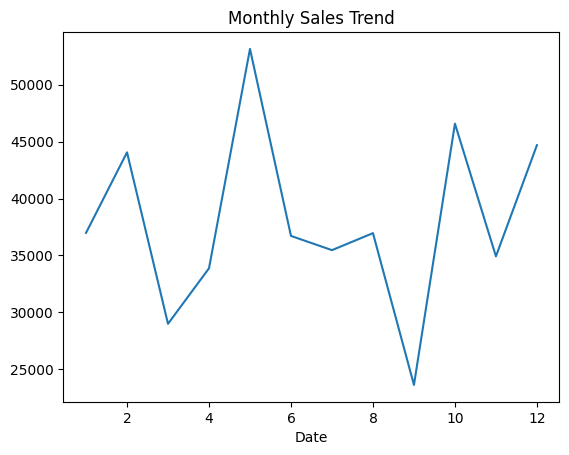

In [16]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')

In [18]:
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


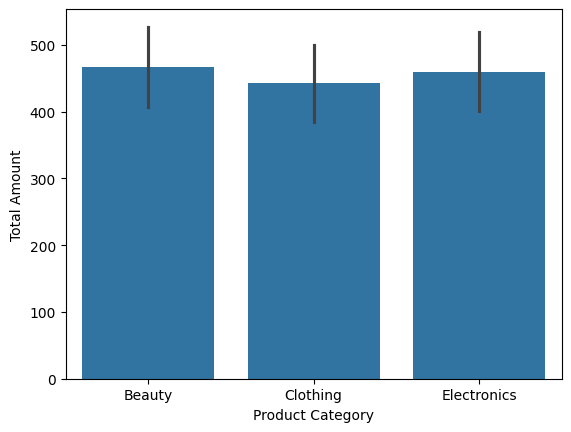

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Product Category', y='Total Amount', data=df)
plt.show()